In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
city = "Springfield"
content = "business"

df = pd.read_csv(f'../filtered_cities/{city}_{content}.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   160 non-null    object 
 1   name          160 non-null    object 
 2   address       155 non-null    object 
 3   city          160 non-null    object 
 4   state         160 non-null    object 
 5   postal_code   160 non-null    int64  
 6   latitude      160 non-null    float64
 7   longitude     160 non-null    float64
 8   stars         160 non-null    float64
 9   review_count  160 non-null    int64  
 10  is_open       160 non-null    int64  
 11  attributes    150 non-null    object 
 12  categories    160 non-null    object 
 13  hours         135 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 17.6+ KB


In [4]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,yni7QxA0Hgw5PbgR4NxKHw,Preferred Party Place,1651 Sicklerville Rd,Sicklerville,NJ,8081,39.750143,-75.023877,4.0,5,1,{'BusinessAcceptsCreditCards': 'True'},"Party Supplies, Event Planning & Services, Par...","{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ..."
1,FBf4fTg9BZrDYxCWTUfdFQ,Healthy Blend Cafe,609 Cross Keys Rd,Sicklerville,NJ,8081,39.735660,-75.006030,3.0,5,1,"{'WiFi': ""'no'"", 'BusinessParking': ""{'garage'...","Food, Juice Bars & Smoothies",NaN
2,n1HOCV74TBVZdQdOUgp9xA,Moe's Southwest Grill,611 Berlin Cross Keys Rd,Sicklerville,NJ,8081,39.735783,-75.008358,2.0,50,0,"{'Alcohol': ""u'none'"", 'BusinessParking': ""{'g...","Tex-Mex, Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,AobR6FbXcVzagwthMfdIzQ,Hollywood Tans,579 Cross-keys Rd,Sicklerville,NJ,8081,39.738671,-75.001987,2.5,5,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Tanning, Beauty & Spas","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
4,wn1rS1Ga9xZ1BIMffnJW5A,Applebee's Grill + Bar,455 Berlin - Cross Keys Rd,Sicklerville,NJ,8081,39.748982,-74.990204,2.5,39,1,"{'RestaurantsTakeOut': 'True', 'OutdoorSeating...","Fast Food, Burgers, Nightlife, Bars, American ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-20:0', ..."


In [5]:
df = df.drop(['city', 'state'], axis=1)

In [6]:
df['categories'] = df['categories'].fillna('Other')

In [7]:
subset_columns = df.columns.difference(['attributes', 'hours'])
df.duplicated(subset=subset_columns).sum()

0

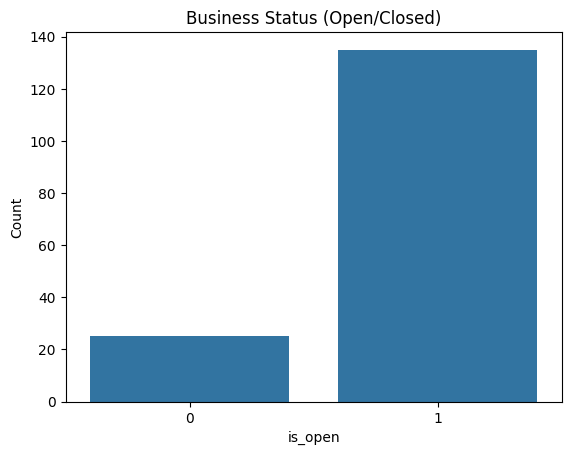

In [8]:
sns.countplot(data=df, x='is_open')
plt.title('Business Status (Open/Closed)')
plt.xlabel('is_open')
plt.ylabel('Count')
plt.show()

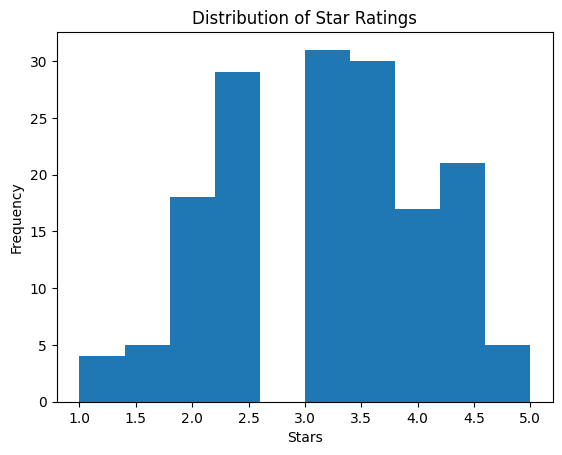

In [9]:
plt.hist(df['stars'])
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

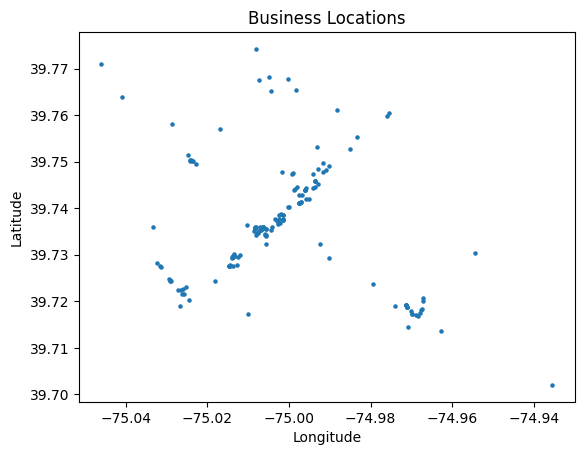

In [10]:
plt.scatter(df['longitude'], df['latitude'], s=5)
plt.title('Business Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
print(f'Number of unique categories: {df["categories"].nunique()}')

Number of unique categories: 141


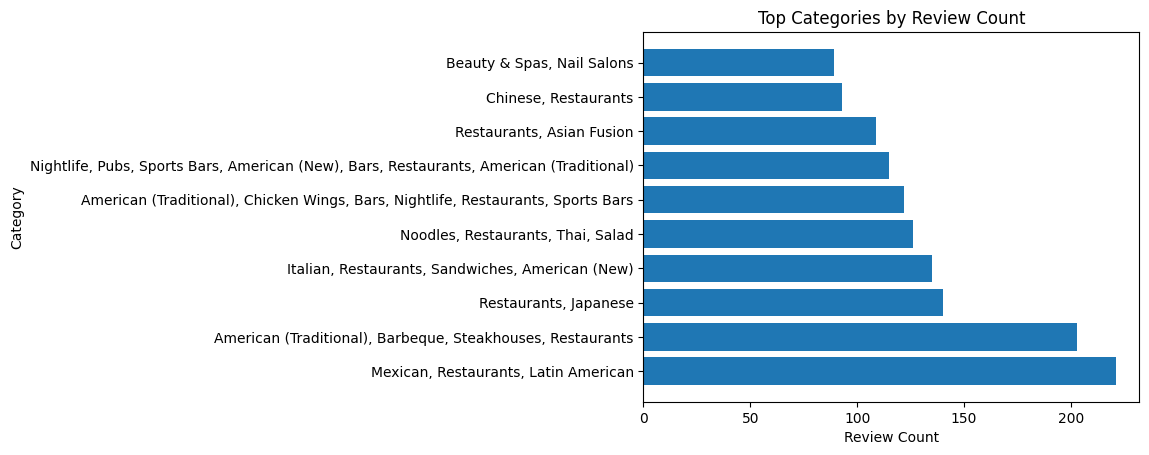

In [12]:
# Categories are separated by commas
# make the index the business id
categories = df['categories'].str.split(',').explode()
categories = categories.str.strip()
categories = categories[categories != '']

categories_df = pd.DataFrame(categories)

# Add the review_count to the categories (categories has an index from 0 to n)
categories_df = categories_df.join(df['review_count'], on=categories.index, how='inner')

# Get the top 10 categories by review count
top_categories = categories_df.groupby('categories')['review_count'].sum().nlargest(10)

plt.barh(top_categories.index, top_categories.values)
plt.title('Top Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Category')
plt.show()

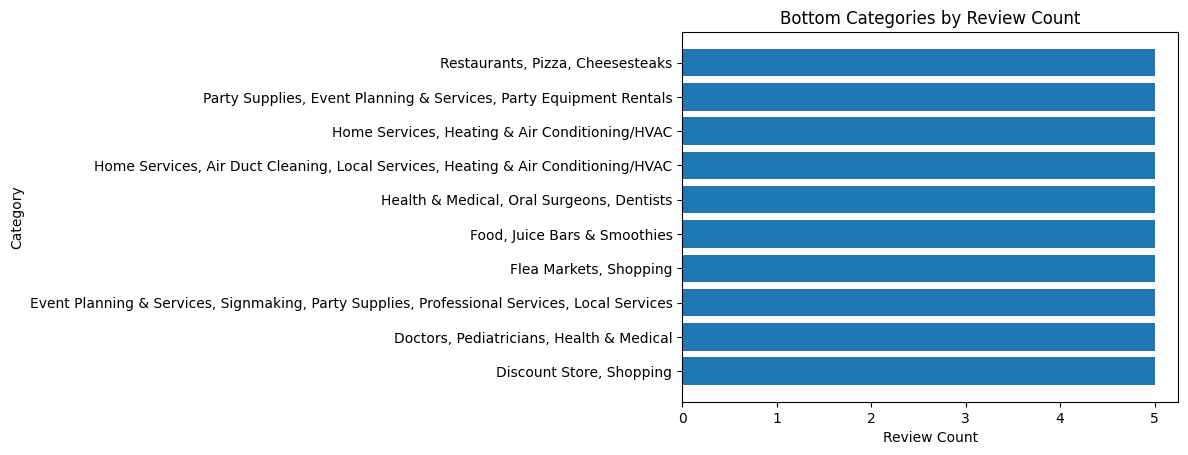

In [13]:
bottom_categories = df.groupby('categories')['review_count'].sum().nsmallest(10)

plt.barh(bottom_categories.index, bottom_categories.values)
plt.title('Bottom Categories by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Category')
plt.show()

In [ ]:
# reviews per business
plt.hist(df['review_count'], bins=100)
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Businesses')
plt.xlim(0, 100)
plt.show()

In [ ]:
# tips per business
df_tips = pd.read_csv(f'../filtered_cities/{city}_tip.csv')
df_tips = df_tips.groupby('business_id').size()

plt.hist(df_tips, bins=100)
plt.title('Distribution of Tip Counts')
plt.xlabel('Tip Count')
plt.ylabel('Businesses')
plt.xlim(0, 25)
plt.show()

In [ ]:
# number of categories per business
categories_per_business = df['categories'].str.split(',').apply(len)

plt.hist(categories_per_business, bins=10)
plt.title('Distribution of Categories per Business')
plt.xlabel('Number of Categories')
plt.ylabel('Businesses')
plt.show()

In [ ]:
# users (y-axis) per business (x-axis)

df_reviews = pd.read_csv(f'../filtered_cities/{city}_review.csv')
df_tips = pd.read_csv(f'../filtered_cities/{city}_tip.csv')

df_reviews = df_reviews.groupby('business_id')['user_id'].nunique()
df_tips = df_tips.groupby('business_id')['user_id'].nunique()

df_users = df_reviews.add(df_tips, fill_value=0)

plt.hist(df_users, bins=100)
plt.title('Distribution of Users per Business')
plt.xlabel('User Count')
plt.ylabel('Businesses')
plt.xlim(0, 100)
plt.show()